In [2]:
import numpy           as np
import mujoco_py       as mjPy
import numpy.linalg as la

model_name='2D_model_w_whip_fixed'
mj_model  = mjPy.load_model_from_path( './models/' + model_name + ".xml" ) 
mj_data= mjPy.MjSim( mj_model ).data

def get_data_prop( mj_model, mj_data, elem_name: str, name: str, prop_name:str ):
    """
        A method which simplifies the sentence for calling the property in interest
        If executes the following sentence.
            mj_data."elem_name" + "prop_name", 

            [Example] mj_data.body_mass

            name is needed for finding that value. 
    """

    # Saving the method (mth) that we will use. 
    mth = getattr( mj_model, "_".join( [ elem_name, "name2id" ] ) )

    # Returning the value.
    return getattr( mj_data, "_".join( [ elem_name, prop_name ] ) )[  mth( "_".join( [ elem_name, name ]  ) )  ]

def get_length( mj_model, mj_data, elem1_type:str, elem1_name:str, elem2_type:str, elem2_name:str ):
    """
        Get the Euclidean distance between two elements. 

        Arguments
        --------
            [1] elem1_type: "site" or "body" or "geom" etc. 
            [2] elem1_name: name of element 1
            [3] elem2_type: "site" or "body" or "geom" etc. 
            [4] elem2_name: name of element 2

        This function will eventually derive the distance between 
        {elem1_type}_{elem1_name} and {elem2_type}_{elem2_name}.

        The crucial point is that we should use "xpos" rather than "pos", because the former one returns the Cartesian coord. 

        [Example]
            - length_elem2elem( mj_data, "site", "upper_arm_end", "site", "fore_arm_end" )
              returns the distance between "site_upper_arm_end" and "site_fore_arm_end".

    """

    return np.linalg.norm( get_data_prop( mj_model, mj_data, elem1_type, elem1_name, "xpos" ) - get_data_prop( mj_model, mj_data, elem2_type, elem2_name, "xpos" )  , ord = 2  )

#get_length( mj_model, mj_data, "geom", "target", "geom", "whip_node24" )
#mj_data.geom_xpos[-1][:2]=np.random.uniform(low=-0.2, high=0.2, size=2)
#mj_data.get_body_xquat("body_whip_node1")

mj_data.body_xpos[:].shape


(17, 3)

Text(0.5, 1.0, 'b_es, b_ee')

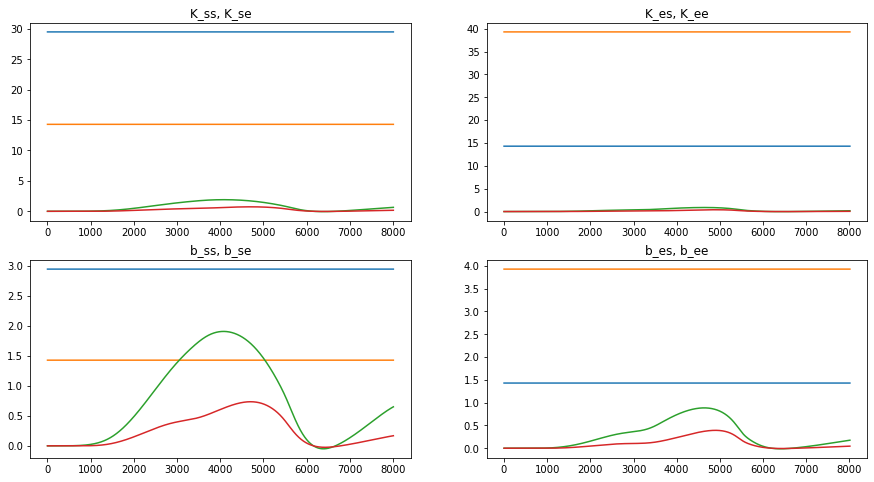

In [4]:
# read npy file track_err with paper version
# # self.Kq= track_err*self.q_err.T/adapt_scale
# # self.Bq= track_err*self.v_err.T/adapt_scale

import numpy as np
import matplotlib.pyplot as plt

mat_k=np.load('tmp_k_no.npy')
mat_b=np.load('tmp_b_no.npy')
m_k=np.load("tmp_k.npy")
m_b=np.load("tmp_b.npy")
# mat_b.reshape(11728,4)
k00=mat_k[:,0]
k11=mat_k[:,1]
b00=mat_b[:,0]
b11=mat_b[:,1]

kk00=m_k[:,0]
kk11=m_k[:,1]
bb00=m_k[:,0]
bb11=m_k[:,1]

width=15
height=8
fig,axes= plt.subplots(2,2, figsize=(width,height))  
axes[0,0].plot(k00)
axes[0,0].plot(kk00)
axes[0,0].set_title("K_ss, K_se")

axes[0,1].plot(k11)
axes[0,1].plot(kk11)
axes[0,1].set_title("K_es, K_ee")

axes[1,0].plot(b00)
axes[1,0].plot(bb00)
axes[1,0].set_title("b_ss, b_se")

axes[1,1].plot(b11)
axes[1,1].plot(bb11)
axes[1,1].set_title("b_es, b_ee")



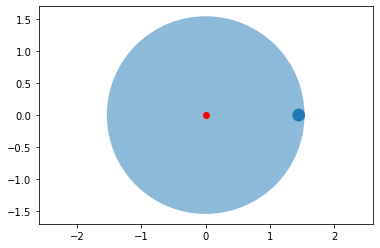

In [6]:
from matplotlib.patches import Ellipse, Circle
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

cir1 = Circle(xy = (0.0, 0.0), radius=1.54, alpha=0.5)
cir2= Circle(xy=(1.45,0),radius=0.1)

ax.add_patch(cir1)
ax.add_patch(cir2)
x, y = 0, 0
ax.plot(x, y, 'ro')

plt.axis('scaled')
plt.axis('equal')   #changes limits of x or y axis so that equal increments of x and y have the same length

plt.show()

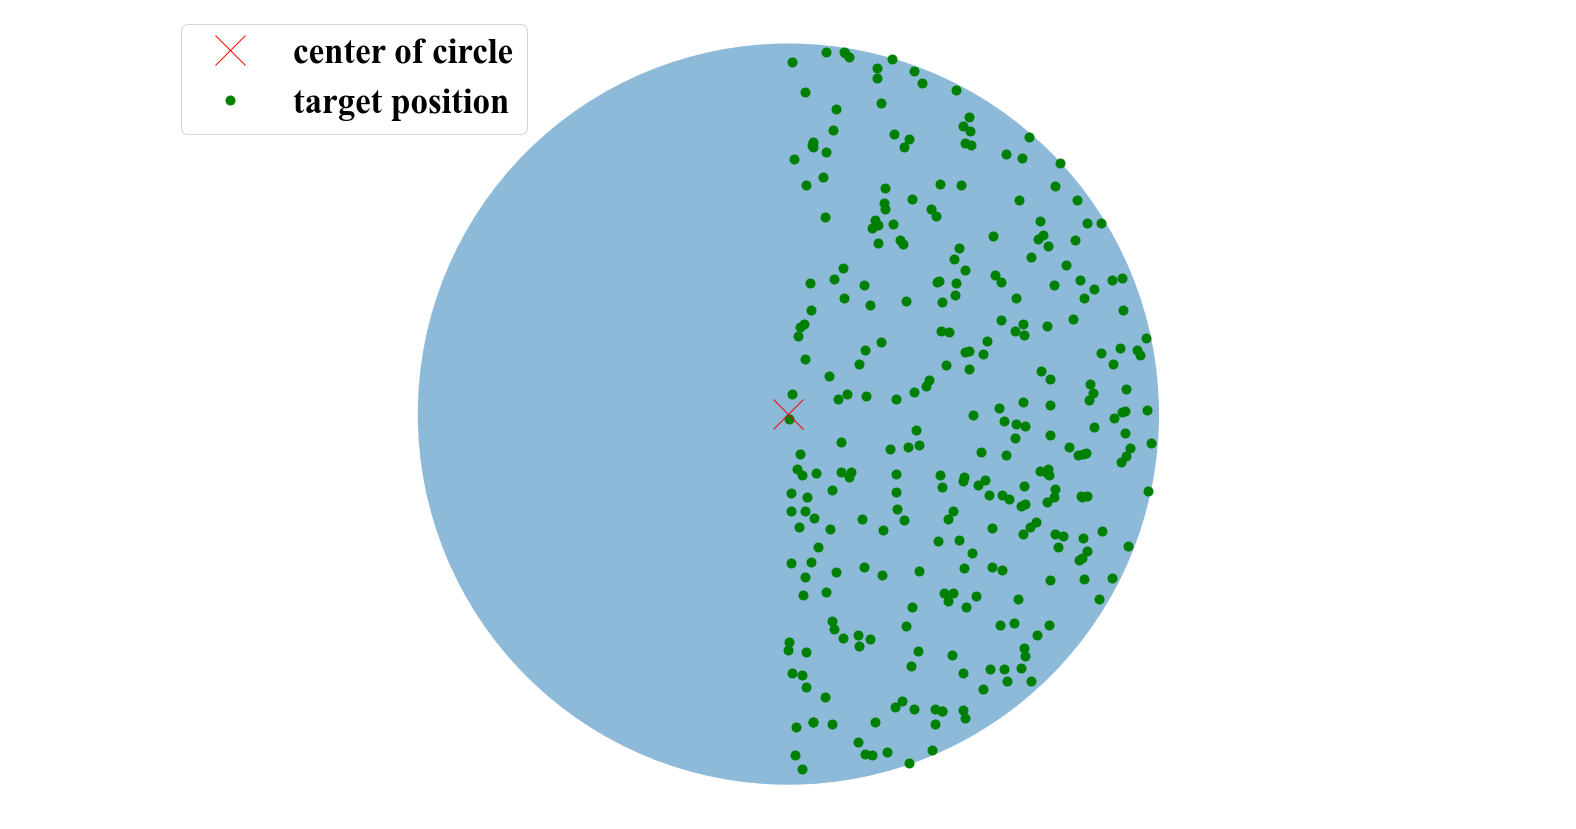

In [5]:
from matplotlib.patches import Ellipse, Circle
import matplotlib.pyplot as plt
import random
import math
import matplotlib as mpl
plt.rc('font',family='Times New Roman')
mpl.rcParams['font.weight'] = 'bold'
bwith=6
font_size=40
width=28
height=15
def random_target(seed):
    """
        this function is used for generating 300 fake random targets, because
    each algorithm would be compared with these same random targets.
    """
    radius=0.1
    goal_x=[]
    goal_y=[]
    random.seed(seed)
    for _ in range(300):
        while True:
            x = random.uniform(0, radius)
            y = random.uniform(-radius, radius)
            if math.sqrt(x**2+y**2) <= radius:              
                break
        goal_x.append(x)
        goal_y.append(y)

    return goal_x, goal_y

fig,axes= plt.subplots(1,1,figsize=(width,height))
ax  = plt.gca()
ax.spines['top'].set_color('none')  # set the upper spine as none
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
cir1 = Circle(xy = (1.45, 0.0), radius=0.1, alpha=0.5)
ax.add_patch(cir1)
x,y=random_target(0)
for i in range(299):
    # if i <30:
    #     ax.plot(x[i]+1.45, y[i], 'mo',markersize=9)
    #     #print(f'{i},[x,y],[{x[i]+1.45},{y[i]}]')
    # else:
        ax.plot(x[i]+1.45, y[i], 'go',markersize=9)
cir_1,cir_2=1.45,0
ax.plot(cir_1,cir_2,'rx',label='center of circle', markersize=30)
ax.plot(x[-1]+1.45, y[-1], 'go', label='target position',markersize=9)
#ax.plot(x[0]+1.45, y[0], 'mo', label='selected target position',markersize=9)

axes.tick_params(axis='x',labelsize=font_size)
axes.tick_params(axis='y',labelsize=font_size)
plt.legend(bbox_to_anchor = (0.1, 1),loc='upper left',prop={'size':35})
# plt.xticks([])
# plt.yticks([])
plt.axis('scaled')
plt.axis('equal')   #changes limits of x or y axis so that equal increments of x and y have the same length
plt.axis('off')
plt.savefig("images/target_zone1.svg",dpi=300, transparent=True)
plt.show()


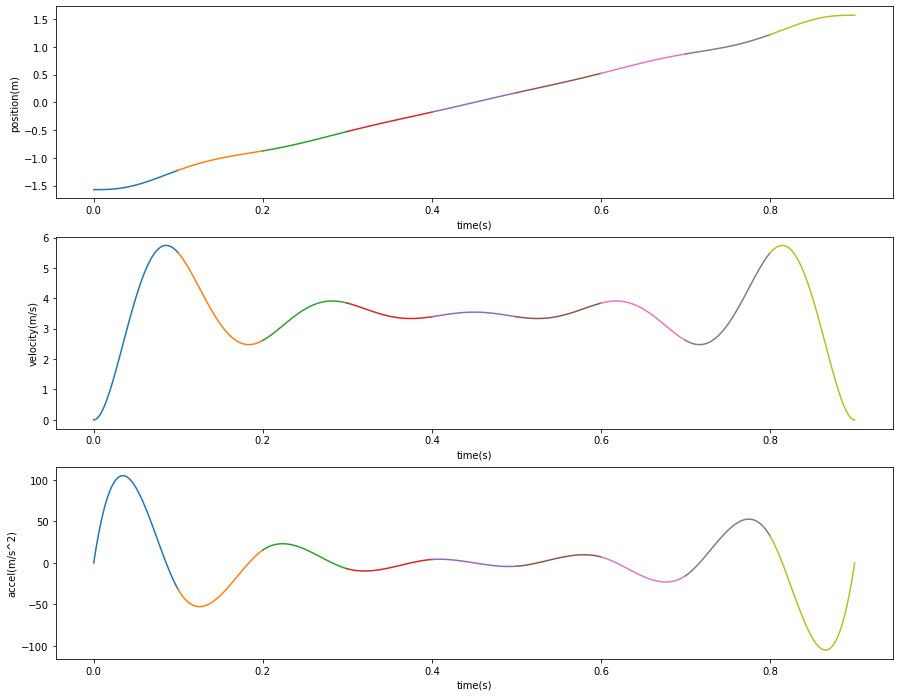

In [14]:
# convex optimization
from math import pi
import cvxpy as cp
from cvxopt import matrix

def getQk(T_down, T_up):
    Q = np.zeros((6, 6))
    Q[3][4] = 72 * (T_up**2 - T_down**2)
    Q[3][5] = 120 * (T_up**3 - T_down**3)
    Q[4][5] = 360 * (T_up**4 - T_down**4)
    Q = Q + Q.T # Q为对称矩阵
    Q[3][3] = 36 * (T_up**1 - T_down**1)
    Q[4][4] = 192 * (T_up**3 - T_down**3)
    Q[5][5] = 720 * (T_up**5 - T_down**5)
    return Q

q0=-0.5*pi
q1=0.5*pi
t=1.0
space=10
deltat=t/space
path=np.linspace(q0,q1,space)
T=np.linspace(0,deltat*(len(path)-1),len(path))

########### 目标函数 ###########
######## 1/2xTQx + qTx ########
K = 3                   # jerk为3阶导数，取K=3
n_order = 2 * K - 1     # 多项式阶数
M = len(path) - 1          # 轨迹的段数
N = M * (n_order + 1)   # 矩阵Q的维数

Q = np.zeros((N, N))
for k in range(1, M + 1):
    Qk = getQk(T[k - 1], T[k])
    Q[(6 * (k - 1)) : (6 * k), (6 * (k - 1)) : (6 * k)] = Qk

Q = Q * 2 # 因为标准目标函数为： 1/2xTQx + qTx，所以要乘2

########### 约束 ###########
# 1.导数约束 Derivative Constraint
A0 = np.zeros((2 * K + M - 1, N)) 
b0 = np.zeros(len(A0))

# 添加首末状态约束(包括位置、速度、加速度)
for k in range(K): 
    for i in range(k, 6):
        c = 1
        for j in range(k):
            c *= (i - j)
        A0[0 + k * 2][i]                = c * T[0]**(i - k)
        A0[1 + k * 2][(M - 1) * 6 + i]  = c * T[M]**(i - k)
b0[0] = path[0]
b0[1] = path[M]
# 添加每段轨迹的初始位置约束
for m in range(1, M):
    for i in range(6):
        A0[6 + m - 1][m * 6 + i] = T[m]**i
    b0[6 + m - 1] = path[m]

# 2.连续性约束 Continuity Constraint
A1 = np.zeros(((M - 1) * 3, N))
b1 = np.zeros(len(A1))
for m in range(M - 1):
    for k in range(3): # 最多两阶导数相等    
        for i in range(k, 6):
            c = 1
            for j in range(k):
                c *= (i - j)
            index = m * 3 + k
            A1[index][m * 6 + i] = c * T[m + 1]**(i - k)
            A1[index][(m + 1)* 6 + i] = -c * T[m + 1]**(i - k)
A = np.vstack((A0, A1))
b = np.hstack((b0, b1))
#%% 解二次规划问题
from cvxopt import matrix, solvers
# 目标函数
Q = matrix(Q)
q = matrix(np.zeros(N))
# 等式约束: Ax = b
A = matrix(A)
b = matrix(b)
result = solvers.qp(Q, q, A=A, b=b)
p_coff = np.asarray(result['x']).flatten()

#%% 可视化结果
Pos = []
Vel = []
Acc = []
for k in range(M):
    t = np.linspace(T[k], T[k + 1], 100)
    t_pos = np.vstack((t**0, t**1, t**2, t**3, t**4, t**5))
    t_vel = np.vstack((t*0, t**0, 2 * t**1, 3 * t**2, 4 * t**3, 5 * t**4))
    t_acc = np.vstack((t*0, t*0, 2 * t**0, 3 * 2 * t**1, 4 * 3 * t**2, 5 * 4 * t**3))
    coef = p_coff[k * 6 : (k + 1) * 6]
    coef = np.reshape(coef, (1, 6))
    pos = coef.dot(t_pos)
    vel = coef.dot(t_vel)
    acc = coef.dot(t_acc)
    Pos.append([t, pos[0]])
    Vel.append([t, vel[0]])
    Acc.append([t, acc[0]])
Pos = np.array(Pos)
Vel = np.array(Vel)
Acc = np.array(Acc)
plt.figure(figsize=(15,12))
plt.subplot(3, 1, 1)
plt.plot(Pos[:, 0, :].T, Pos[:, 1, :].T)
# plt.title("position")
plt.xlabel("time(s)")
plt.ylabel("position(m)")
plt.subplot(3, 1, 2)
plt.plot(Vel[:, 0, :].T, Vel[:, 1, :].T)
# plt.title("velocity")
plt.xlabel("time(s)")
plt.ylabel("velocity(m/s)")
plt.subplot(3, 1, 3)
plt.plot(Acc[:, 0, :].T, Acc[:, 1, :].T)
# plt.title("accel")
plt.xlabel("time(s)")
plt.ylabel("accel(m/s^2)")
plt.show()

In [5]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch import optim
import torch.nn.functional as F

import cvxpy as cp 
from cvxpylayers.torch import CvxpyLayer

Batch = 10
n = 5
c = 1/2

#风险预算模型依赖的参数：资产的协方差矩阵Sigma(n*n)和风险预算向量b(n*n)
#首先定义该凸优化问题
b = cp.Parameter(n,nonneg = True)
Q = cp.Parameter((n,n))
y = cp.Variable(n)
cons = [y>=0,b.T @ cp.log(y) >= c]
obj = cp.Minimize(cp.sum_squares(Q @ y))
prob = cp.Problem(obj,cons)

#risk budget net
class RiskNet(nn.Module):
    
    def __init__(self,num_assets,num_factors):
        super(RiskNet,self).__init__()
        self.num_features = num_assets * num_factors
        self.fc1_num= 10
        self.fc2_num = 5
        self.fc1 = nn.Linear(self.num_features,self.fc1_num)
        self.fc2 = nn.Linear(self.fc1_num,self.fc2_num)
        self.Leakyrelu = nn.PReLU()
        self.HardTanh = nn.Hardtanh(0.05,0.3) #控制风险预算的范围,由于先经过softmax层因此都是正实数
        self.softmax = nn.Softmax(dim = 1)
    
    def forward(self,x):
        #forward过程写成了分步形式方便理解
        x = x.view(-1,self.num_features) #Batch*55
        x = self.fc1(x)
        x = self.Leakyrelu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        x = self.HardTanh(x)
        return x    

#实例化网络层
risknet = RiskNet(5,1)
layer = CvxpyLayer(prob,[b,Q],[y])#定义植入torch的凸优化层,注意参数都要放在列表内

batch_factor = torch.randn((Batch,1,n),requires_grad=True) #5个资产各11个特征，55个因子
Q = torch.randn((Batch,n,n),requires_grad = True) #5个资产的协方差矩阵
r = torch.randn((Batch,n),requires_grad = True) #label，未来10日的收益率向量
b = risknet(batch_factor)
loss_sum = 0
for i in range(Batch): #cvxpylayer貌似不能按照batch进行计算
    risk_budget = b[i]
    Sigma = Q[i]
    return_vector = r[i]
    y_star, = layer(risk_budget,Sigma)
    weight = y_star/torch.sum(y_star)
    loss_sum += -1 * 1/Batch * torch.matmul(weight,return_vector)#组合收益率的负数
    print(loss_sum)
    print("weight",weight)
    print("rv:",return_vector)
loss_sum.backward()

tensor(-0.0335, grad_fn=<AddBackward0>)
weight tensor([0.2447, 0.2396, 0.1768, 0.1252, 0.2136], grad_fn=<DivBackward0>)
rv: tensor([ 1.1933,  1.3054, -0.6853, -0.1978, -0.5775],
       grad_fn=<SelectBackward0>)
tensor(0.0186, grad_fn=<AddBackward0>)
weight tensor([0.1701, 0.2282, 0.0263, 0.1099, 0.4654], grad_fn=<DivBackward0>)
rv: tensor([-0.0253,  0.0115, -0.3528, -0.1840, -1.0537],
       grad_fn=<SelectBackward0>)
tensor(0.0518, grad_fn=<AddBackward0>)
weight tensor([0.1960, 0.2423, 0.3423, 0.0999, 0.1194], grad_fn=<DivBackward0>)
rv: tensor([-0.8043, -0.7400,  0.7883, -0.7741, -1.5697],
       grad_fn=<SelectBackward0>)
tensor(-0.0204, grad_fn=<AddBackward0>)
weight tensor([0.1734, 0.2470, 0.2730, 0.0664, 0.2402], grad_fn=<DivBackward0>)
rv: tensor([ 0.7238,  0.4831,  0.9245, -0.5655,  1.0928],
       grad_fn=<SelectBackward0>)
tensor(-0.0289, grad_fn=<AddBackward0>)
weight tensor([0.1302, 0.3906, 0.2108, 0.1292, 0.1391], grad_fn=<DivBackward0>)
rv: tensor([-0.1277,  0.3061, -1.4

In [28]:
import torch
import cvxpy as cp
import numpy as np
from cvxpylayers.torch import CvxpyLayer


def split_state_control(x, u):
    assert x.ndim == 2
    assert u.ndim == 2
    assert x.shape[0] == u.shape[0]
    assert x.shape[1] == n
    assert u.shape[1] == m

    return x[:, 0], x[:, 1], x[:, 2], x[:, 3], x[:, 4], x[:, 5], u[:, 0], u[:, 1]

def f_batch(x, u):
    s, e, dpsi, v, vdes, curvature, a, z = split_state_control(x, u)
    
    curvatures_to_not_change = torch.rand_like(curvature) < .95 # change on average every 4 seconds
    curvature_next = curvatures_to_not_change * curvature + ~curvatures_to_not_change * .1 * torch.randn_like(curvature)
    vdes_to_not_change = torch.rand_like(vdes) < .98 # change on average every 10 seconds
    vdes_next = vdes_to_not_change * vdes + ~vdes_to_not_change * torch.distributions.Uniform(3, 6).sample(sample_shape=vdes.shape)
    xnext = torch.stack([
        s + h * v / (1 - e * curvature) * torch.cos(dpsi),
        e + h * v * torch.sin(dpsi),
        dpsi + h * v * (curvature + z / L - curvature / (1 - e * curvature) * torch.cos(dpsi)),
        v + h * a,
        vdes_next,
        curvature_next
    ], dim=1)
    
    xnext[:, 1] += 1e-1*torch.randn(x.shape[0])
    xnext[:, 2] += 1e-2*torch.randn(x.shape[0])
    xnext[:, 3] += 1e-1*torch.randn(x.shape[0])
    
    return xnext

def cost_batch(x, u):
    s, e, dpsi, v, vdes, curvature, a, z = split_state_control(x, u)

    return (v - vdes).pow(2) + lam_1 * e.pow(2) + lam_2 * dpsi.pow(2) + \
        lam_3 * a.pow(2) + lam_4 * z.pow(2)

L = 2.8
h = .2
n = 6
m = 2

lam_1 = 1
lam_2 = 1
lam_3 = 10
lam_4 = 10
# approximate value function
P_sqrt = cp.Parameter((4, 4))
q = cp.Parameter(4)

# dynamics
fx = cp.Parameter(4)
B = cp.Parameter((4, 2))
curvature = cp.Parameter(1)

u = cp.Variable(2)
y = cp.Variable(4)

a = u[0]
z = u[1]
objective = lam_3 * cp.square(a) + lam_4 * cp.square(z) + \
    cp.sum_squares(P_sqrt @ y) + q @ y
constraints = [y == fx + B @ u, cp.abs(a) <= 2, cp.abs(z + L * curvature) <= .68]
prob = cp.Problem(cp.Minimize(objective), constraints)
policy = CvxpyLayer(prob, [P_sqrt, q, fx, B, curvature], [u])
print(prob.parameters())

ValueError: The layer's parameters must exactly match problem.parameters

In [ ]:

# loss func
def loss(time_horizon, batch_size, P_sqrt, q, seed=None):

    if seed is not None:
        torch.manual_seed(seed)
    X, U = [], []
    x = torch.zeros(batch_size, n)
    x[:, 1] = .5
    x[:, 2] = .1
    x[:, 3] = 3
    x[:, 4] = 4.5
    loss = 0.0
    for _ in range(time_horizon):
        _, e, dpsi, v, vdes, curvature, _, _ = split_state_control(x, torch.zeros(batch_size, 2))
        enext = e + h * v * torch.sin(dpsi)
        dpsi_next = dpsi + h * v * (curvature - curvature / (1 - e * curvature) * torch.cos(dpsi))
        fx = torch.stack([
                enext,
                dpsi_next,
                v - .98*vdes-.02*4.5,
                enext + h * v * torch.sin(dpsi_next)
            ], dim=1)
        B = torch.zeros(batch_size, 4, 2)
        B[:, 1, 1] = h * v / L
        B[:, 2, 0] = h
        B[:, 3, 1] = h * h * v * v / L
        u, = policy(P_sqrt, q, fx, B, curvature.unsqueeze(-1), solver_args={"acceleration_lookback": 0})
        X.append(x.detach().numpy().squeeze())
        U.append(u.detach().numpy().squeeze())
        loss += cost_batch(x, u).mean() / time_horizon
        x = f_batch(x, u)
    return loss, np.array(X), np.array(U)

P_sqrt = torch.eye(4)
P_sqrt.requires_grad_(True)
q = torch.zeros(4, requires_grad=True)   
params = [P_sqrt, q]
opt = torch.optim.SGD(params, lr=.1)
losses = []
for k in range(10):
    with torch.no_grad():
        test_loss, X, U = loss(100, 4, P_sqrt.detach(), q.detach(), seed=0)
        losses.append(test_loss)
        print("it: %03d, loss: %3.3f" % (k+1, test_loss.item()))
        print(X,U)
    opt.zero_grad()
    l, _, _ = loss(100, 1, P_sqrt, q, seed=k+1)

    l.backward()
    torch.nn.utils.clip_grad_norm_(params, 10)
    opt.step()

In [2]:
A = 1.38/2.38
B = 1.5 - (2.45*1.38/2.38)
current_max=10
current_min=-10
tau_min=current_max*A+B
tau_max=current_min*A+B
print("A,B",A,B,"TAU",tau_min,tau_max)

A,B 0.5798319327731092 0.07941176470588229 TAU 5.8777310924369734 -5.718907563025209


[ 0.   -0.    0.31]
[0.   0.   0.31]
[ 0.15905 -0.       0.67702]
[ 0.15905 -0.       0.67702]
[-0.01986  0.       1.03477]
[-0.01986  0.       1.03477]
[-0.09814  0.       1.19129]


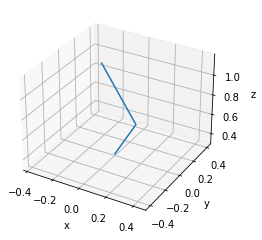

In [12]:
# a model of robot arm maybe useful later
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from math import radians, sin, cos


def set_axes_equal(ax):
# 这一段是copy别人的。用处不是很大。
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.
    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

def dh_matrix(alpha, a, d, theta):
# 传入四个DH参数，根据公式3-6，输出一个T矩阵。
    alpha = alpha / 180 * np.pi
    theta = theta / 180 * np.pi
    matrix = np.identity(4)
    matrix[0,0] = cos(theta)
    matrix[0,1] = -sin(theta)
    matrix[0,2] = 0
    matrix[0,3] = a
    matrix[1,0] = sin(theta)*cos(alpha)
    matrix[1,1] = cos(theta)*cos(alpha)
    matrix[1,2] = -sin(alpha)
    matrix[1,3] = -sin(alpha)*d
    matrix[2,0] = sin(theta)*sin(alpha)
    matrix[2,1] = cos(theta)*sin(alpha)
    matrix[2,2] = cos(alpha)
    matrix[2,3] = cos(alpha)*d
    matrix[3,0] = 0
    matrix[3,1] = 0
    matrix[3,2] = 0
    matrix[3,3] = 1
    return matrix

joint_num = 7

# --- Robotic Arm construction ---
# DH参数表，分别用一个列表来表示每个关节的东西。
joints_alpha = [0, 90, 90, 90, 90, 90, 90]
joints_a = [0, 0, 0, 0, 0, 0, 0]
joints_d = [0.31, 0.0, 0.4, 0.0, 0.4, 0.0, 0.175]
joints_theta = [0, 180, 180, 180, 180, 180, 180]

#    Joint Angle variables
# joints_angle = [-0.001, -21.0, -0.001, -21.0, 0.0, 0.0, -0.0]
# 选定几个特定的关节角，看看算出来的值，和真实值是否一致，方向是否反了。
joints_angle = [0, -23.43, 0, 50, 0, 0, 0]
#    DH参数转转换矩阵T---------------------
joint_hm = []
for i in range(joint_num):        
    joint_hm.append(dh_matrix(joints_alpha[i], joints_a[i], joints_d[i], joints_theta[i]+joints_angle[i]))

# -----------连乘计算----------------------
for i in range(joint_num-1):
    joint_hm[i+1] = np.dot(joint_hm[i], joint_hm[i+1])    
# Prepare the coordinates for plotting
for i in range(joint_num):
    print(np.round(joint_hm[i][:3, 3], 5))
# 获取坐标值
X = [hm[0, 3] for hm in joint_hm]
Y = [hm[1, 3] for hm in joint_hm]
Z = [hm[2, 3] for hm in joint_hm]
# Plot
ax = plt.axes(projection='3d')
# ax.set_aspect('equal')
ax.plot3D(X, Y, Z)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

set_axes_equal(ax)
plt.show()

In [29]:
import numpy as np

np.random.seed(0)
def testa():
    valueset=np.linspace(-np.pi,np.pi,1000)
    a=np.random.choice(valueset,5,replace=True)
    print("a",a)
np.random.seed()
def testb():
    valueset=np.linspace(-np.pi,np.pi,1000)
    b=np.random.choice(valueset,5,replace=True)
    print("b",b)
testa()
testb()

a [ 1.69501345 -1.2107239  -1.39940814  2.95919788  2.62585572]
b [-2.95919788  0.19182898 -1.59438186 -2.12269774  1.8585398 ]


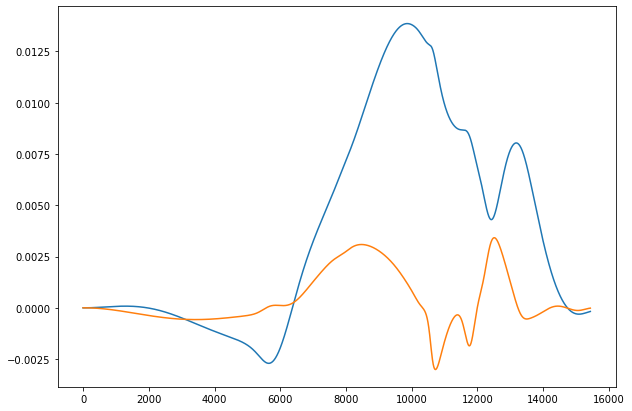

10.22965009177479

In [21]:
import numpy as np
import matplotlib.pyplot as plt
# false oiac
s_tau=np.load("s_tau_False.npy")
e_tau=np.load("e_tau_False.npy")
sum_false_s=sum(s_tau)
sum_false_e=sum(e_tau)
fig, axes=plt.subplots(1,1,figsize=(10,7))
axes.plot(s_tau,label="shoulder")
axes.plot(e_tau,label="elbow")
plt.show()
sum(s_tau)/sum(e_tau)

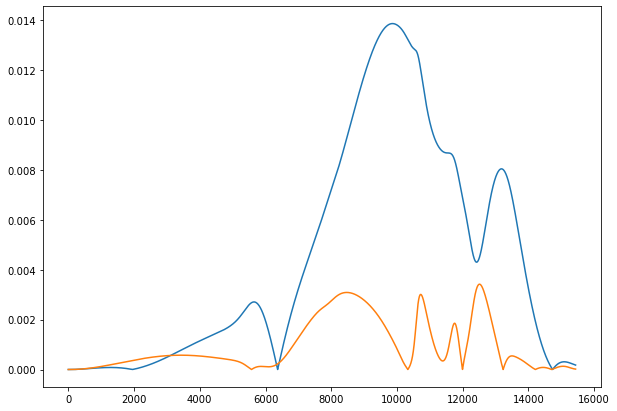

4.721371329906118

In [22]:
# false oiac with abs
s_tau=np.load("s_tau_False.npy")
e_tau=np.load("e_tau_False.npy")
sum_false_s=sum(s_tau)
sum_false_e=sum(e_tau)
fig, axes=plt.subplots(1,1,figsize=(10,7))
axes.plot(s_tau,label="shoulder")
axes.plot(e_tau,label="elbow")
plt.show()
sum(s_tau)/sum(e_tau)

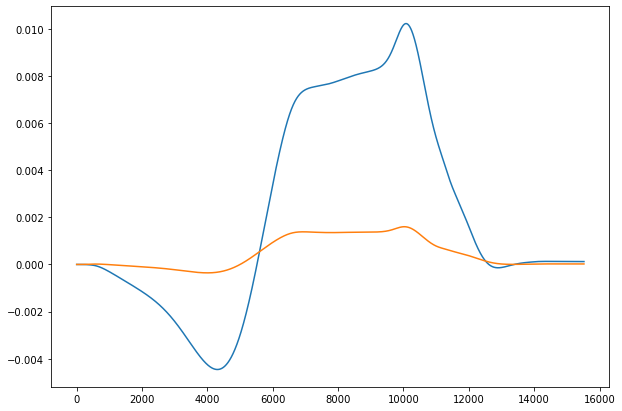

4.57457997951725

In [20]:
# true oiac
s_tau=np.load("s_tau_True.npy")
e_tau=np.load("e_tau_True.npy")
fig, axes=plt.subplots(1,1,figsize=(10,7))
axes.plot(s_tau,label="shoulder")
axes.plot(e_tau,label="elbow")
plt.show()
sum(s_tau)/sum(e_tau)


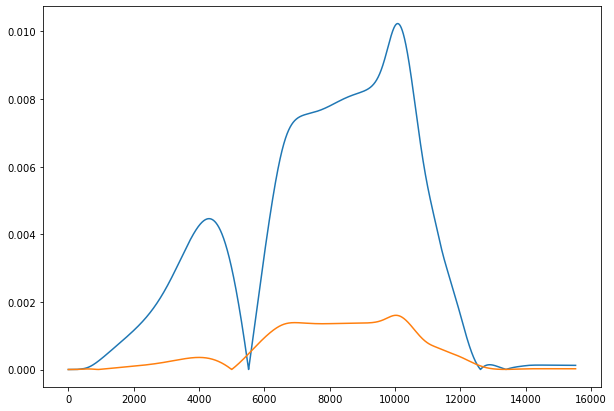

6.291661917036775

In [23]:
# true oiac
s_tau=np.load("s_tau_True.npy")
e_tau=np.load("e_tau_True.npy")
fig, axes=plt.subplots(1,1,figsize=(10,7))
axes.plot(s_tau,label="shoulder")
axes.plot(e_tau,label="elbow")
plt.show()
sum(s_tau)/sum(e_tau)

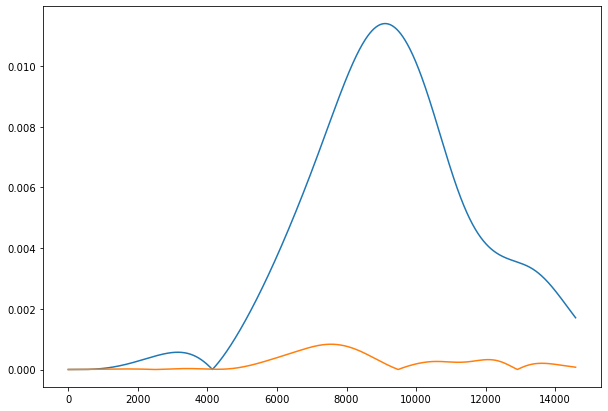

18.525563815363466

In [9]:
# validate the new energy dots
import numpy as np
import matplotlib.pyplot as plt
# false oiac
s_tau=np.load("energy_consumption/s_tau_False_0.08.npy")
e_tau=np.load("energy_consumption/e_tau_False_0.08.npy")
sum_false_s=sum(s_tau)
sum_false_e=sum(e_tau)
fig, axes=plt.subplots(1,1,figsize=(10,7))
axes.plot(s_tau,label="shoulder")
axes.plot(e_tau,label="elbow")
plt.show()
sum(s_tau)/sum(e_tau)